# Visualzing Earnings Based On College Majors

In this project I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

#### Setting Up The Data Set For Analysis

In [4]:
## Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the dataset into a dataframe and initial data exploration
recent_grads = pd.read_csv('recent-grads.csv')

###### First row formatted as a table:

In [5]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

###### First 5 rows to become familiar with the table structure:

In [6]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


###### Summary Statistics for all numerical columns:

In [7]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


###### Cleaning the dataset:
We are going to drop any rows with missing data from the dataset

In [8]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [9]:
recent_grads = recent_grads.dropna(axis=0)
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


As can be seen from data counts above our original data had 173 rows but only 1 row had missing values so we will continue working without this row.

### Scatter Plot Analysis

In [10]:
## Scatter Plot Generator
def scatter_plot(x, y):
    return recent_grads.plot(x=x, y=y, kind='scatter',title = x + ' vs. ' + y, 
                             figsize=(7,10))


###### Sample size vs. Median

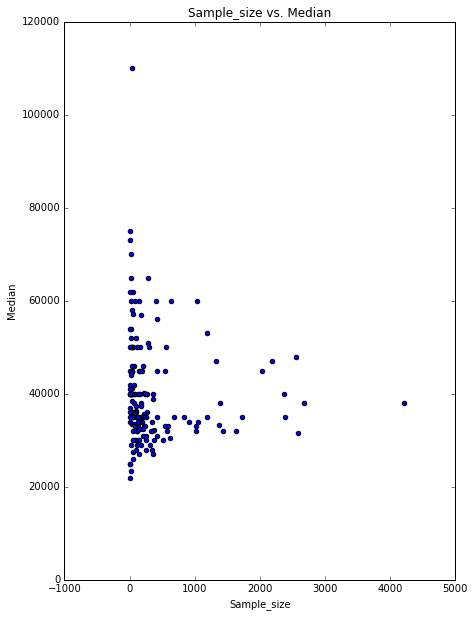

In [11]:
scatter_plot('Sample_size', 'Median')

There doesn't seem to be a correlation between sample size and median income particularly when sample sizes are small (less than 1000)  however for high sample sizes, which most likely reperesent more popular majors median incomes begin to converge towards an average of 40,000.

###### Sample_size versus Unemployment Rate

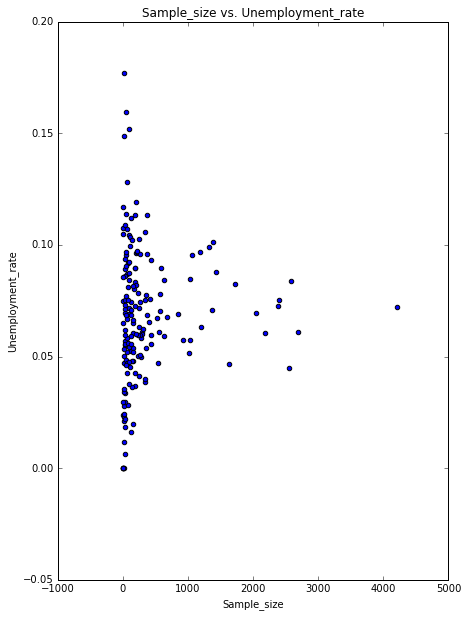

In [12]:
scatter_plot('Sample_size','Unemployment_rate')

A very similar trend between sample size and unemployment rate exists as with median income. No clear correlation for small sample sizes but as sample sizes grow unemployment rates converge towards roughly 7%

###### Full Time versus Median

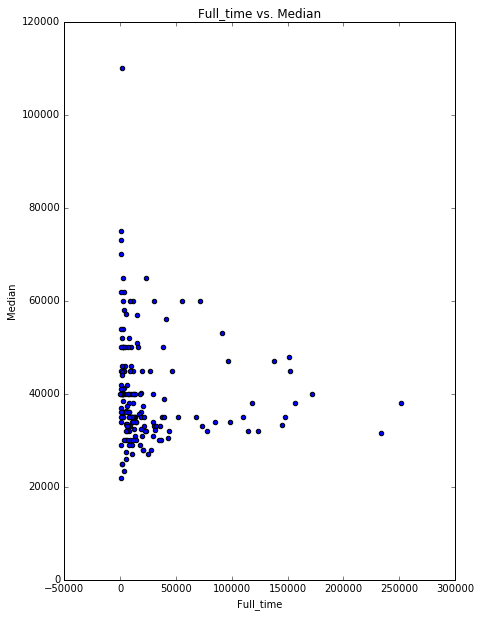

In [13]:
scatter_plot('Full_time', 'Median')

Once again there is no obvious correlation between the number of people employed full time per major and median income for the lower numbers(less than 50,000) however as number of people employed full time grows beyond 50,000 median income tends to decrease.

###### Share of Women Versus Unemployment

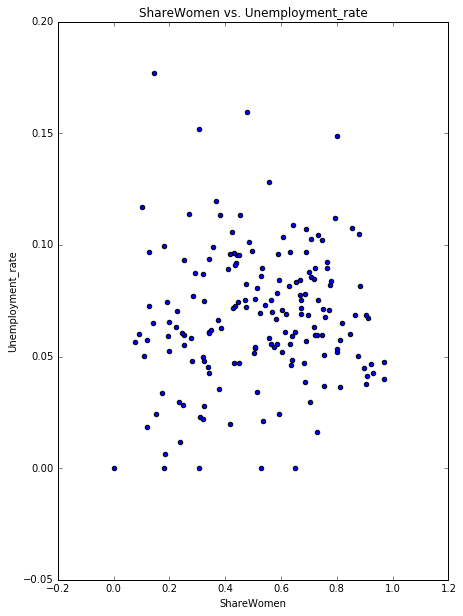

In [14]:
scatter_plot('ShareWomen', 'Unemployment_rate')

There appears to be no correlation between unemployment rates and the share of women in the major.

###### Men versus Median

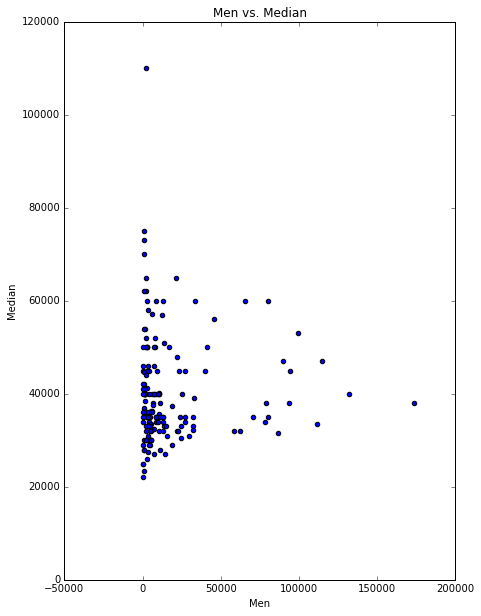

In [15]:
scatter_plot('Men', 'Median')

Consistent with the other paramaters we have tested for as long as numbers are low income varies greatly but as numbers increase beyond a certain threshold income converges towards the population median income of $40,000

###### Women Versus Median

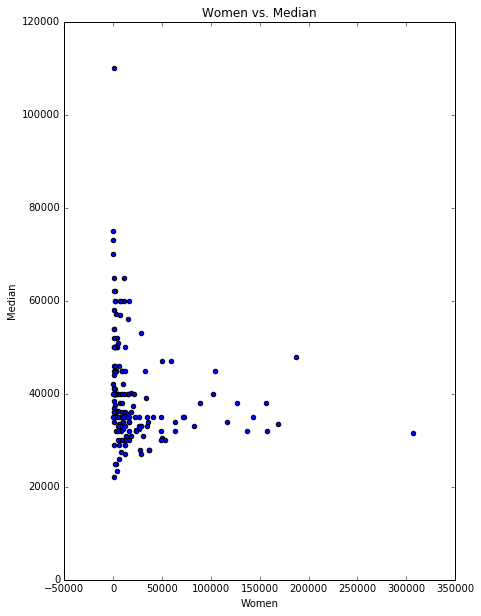

In [16]:
scatter_plot('Women', 'Median')



Similar to men, for majors with low populations incomes range from very low to very high but then begin to converge as numbers increase. Dissimilar to men however, women's median income converges to roughly $30,000.

#### Scatter Plot Conclusions
-  Students in more popular majors tend to make around the median income and have median level unemployment.
- There is no correlation in employment rates between majors that are majority male or female.
- Median income for women in popular majors converges to a lower median income than men.
- Majors low in popularity have both the highest and lowest median incomes as well as unemployment rates.

The above conclusions seem to suggest what we know intuitively, that popularity to a large extent drives medians and that incomes are normally distributed with a large majority of people somewhere around the middle with very few people at the extremeties.

### Distribution Analysis Using Boxplots

###### Sample Size Distribution

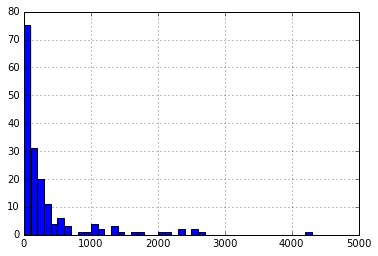

In [17]:
recent_grads['Sample_size'].hist(bins=50, range=(0,5000))


As we would expect as sample size increases the frequency of each sample size decreases

###### Median Income Distribution

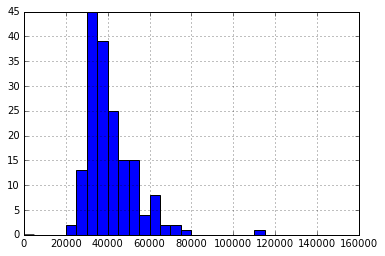

In [18]:
recent_grads['Median'].hist(bins=30, range=(0,150000))


The median income is normally distributed with a slight positive skew. The median income range is \$35,000 to $40,000

###### Share of Women

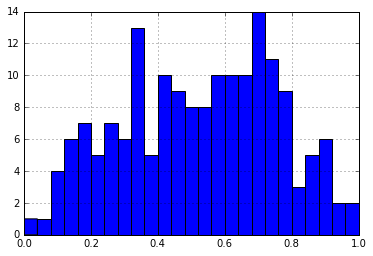

In [19]:
recent_grads['ShareWomen'].hist(bins=25, range=(0,1))

It appears that roughly half the majors are predominantly female, which necessarily means that half the majors are predominantly male

###### Unemployment Rate 

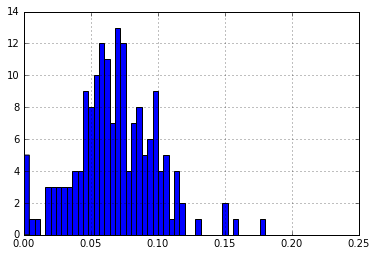

In [20]:
recent_grads['Unemployment_rate'].hist(bins=50, range=(0,.2))

There are 5 majors in the 0 to 0.4% unemployment bin. Thereafter the distribution follows a relatively normal pattern with most majors having roughly 6-7.5% unemployment 

### Scatter Matrix Plots

One way to immediately generate quick visuals using multiple columns of data is generating a scatter plot. Scatter plots show distribution histograms for the selected data as well as scatter plots.

In [21]:
#importing the scatter matrix module
from pandas.tools.plotting import scatter_matrix

###### Sample Size versus Median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39683edb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f39682516d8>]], dtype=object)

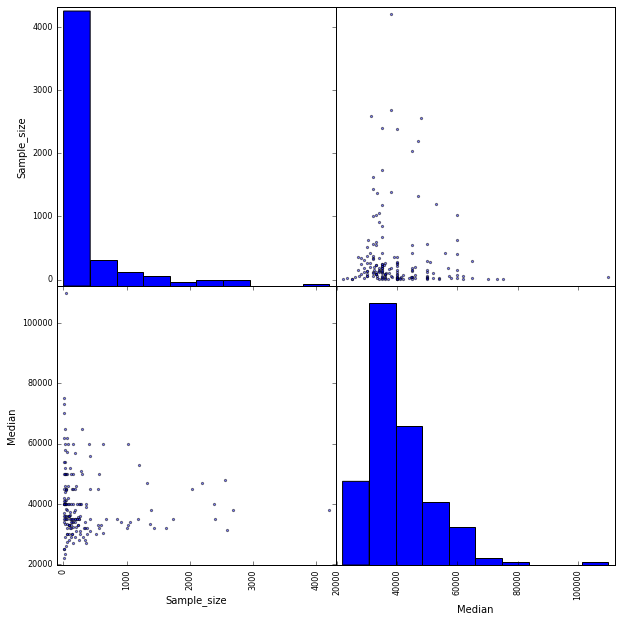

In [22]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

###### Sample size, Median Income, and Unemployment Rate Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f393715f278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3936ebce48>]], dtype=object)

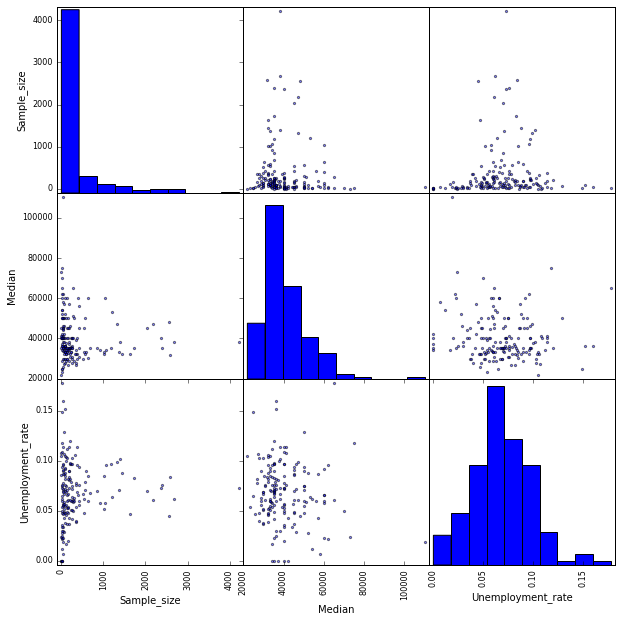

In [23]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

### Comparing the 10 highest paying majors to the 10 lowest paying majors

###### Share of Women in the majors

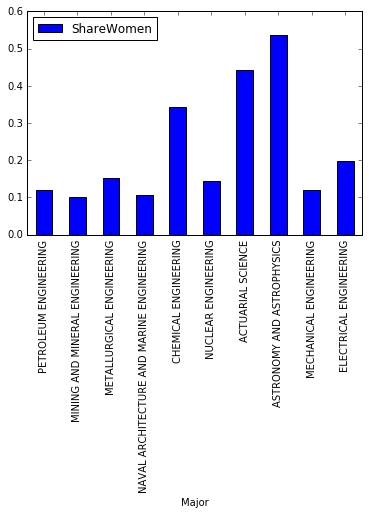

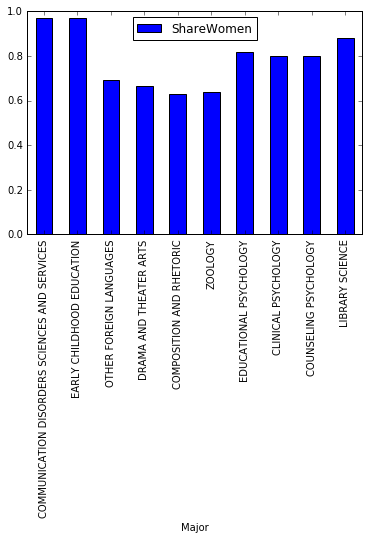

In [28]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
ax2 = recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')


Only one of the top 10 paying majors (Astronomy and Astrophysics) has a higher proportion of women than men and even in that major the percentages are close to even. 

However women dominate all the lowest 10 paying majors. This probably explains the lower median incomes for female recent graduates as opposed to males, however it is unclear from the data why there are large gender disparities within these particular majors.

Personally I am hopeful that the recent emphasis on promoting women in STEM (Science, Technology, Engineering and Mathematics) fields, in which all top 10 paying majors are found, will begin to yield results that reduce the disparity.

###### Unemployment Rates between the majors

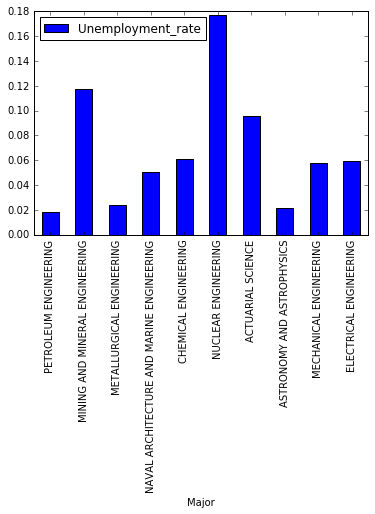

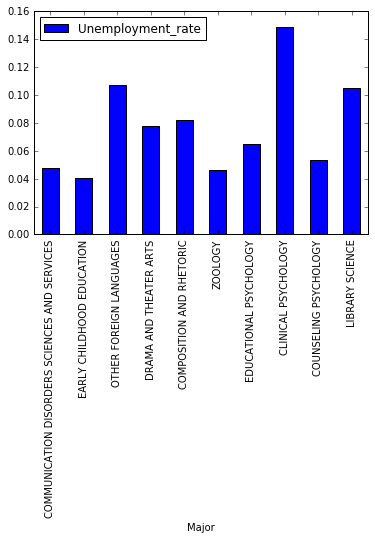

In [30]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
ax2 = recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

All but 3 of the top paying majors have unemployment rates lower than the median 7% rate whereas 5 such majors of the lowest paying category are above this median. 
It is interesting to note, however, that the highest unemployment rate among the 20 majors is nearly 18% in Nuclear Engineering which is a top paying major, which may suggest that though the income is good, the supply of nuclear engineers is far greater than the demand

## Conclusion

One of the things we were able to visualize from the data is the median wage gap between men and women. It appears to be related to the gender gap in college majors, that is to say, women are significantly under-represented in the highest paying majors and are an overwhelming majority in the lower paying programs. One possible explanations that has been posited ise that women have historically been discouraged from pursuing careers in STEM fields which are consistently the highest paying careers in the modern world. 

If contemporary media is to be believed efforts have been made and are being made to encourage greater participation in the STEM fields by women and much had been said about the closing gap but one of the many roles of data science is to look at the data analyze it and discern truth from popular opinion. I will be doing just that in my next project, which takes a look at gender participation across 17 major categories from 1970 to 2012. Hopefully we will see a closing of the gap!